# Melbourne Housing Market

Some Key Details
Suburb: Suburb

Address: Address

Rooms: Number of rooms

Price: Price in dollars

Method: S - property sold; SP - property sold prior; PI - property passed in; PN - sold prior not disclosed; SN - sold not disclosed; NB - no bid; VB - vendor bid; W - withdrawn prior to auction; SA - sold after auction; SS - sold after auction price not disclosed. N/A - price or highest bid not available.

Type: br - bedroom(s); h - house,cottage,villa, semi,terrace; u - unit, duplex; t - townhouse; dev site - development site; o res - other residential.

SellerG: Real Estate Agent

Date: Date sold

Distance: Distance from CBD

Regionname: General Region (West, North West, North, North east ...etc)

Propertycount: Number of properties that exist in the suburb.

Bedroom2 : Scraped # of Bedrooms (from different source)

Bathroom: Number of Bathrooms

Car: Number of carspots

Landsize: Land Size

BuildingArea: Building Size

YearBuilt: Year the house was built

CouncilArea: Governing council for the area

Lattitude: Self explanitory

Longtitude: Self explanitory

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
df = pd.read_csv('Melbourne_housing_FULL.csv')

In [3]:
df.head(3)

,Suburb,Address,Rooms,Type,Price,Method,SellerG,Date,Distance,Postcode,...,Bathroom,Car,Landsize,BuildingArea,YearBuilt,CouncilArea,Lattitude,Longtitude,Regionname,Propertycount
0,Abbotsford,68 Studley St,2,h,NaN,SS,Jellis,3/09/2016,2.5,3067,...,1.0,1.0,126.0,NaN,NaN,Yarra City Council,-37.8014,144.9958,Northern Metropolitan,4019.0
1,Abbotsford,85 Turner St,2,h,1480000.0,S,Biggin,3/12/2016,2.5,3067,...,1.0,1.0,202.0,NaN,NaN,Yarra City Council,-37.7996,144.9984,Northern Metropolitan,4019.0
2,Abbotsford,25 Bloomburg St,2,h,1035000.0,S,Biggin,4/02/2016,2.5,3067,...,1.0,0.0,156.0,79.0,1900.0,Yarra City Council,-37.8079,144.9934,Northern Metropolitan,4019.0


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29217 entries, 0 to 29216
Data columns (total 21 columns):
Suburb           29217 non-null object
Address          29217 non-null object
Rooms            29217 non-null int64
Type             29217 non-null object
Price            22850 non-null float64
Method           29217 non-null object
SellerG          29217 non-null object
Date             29217 non-null object
Distance         29217 non-null float64
Postcode         29217 non-null int64
Bedroom2         22665 non-null float64
Bathroom         22659 non-null float64
Car              22357 non-null float64
Landsize         19649 non-null float64
BuildingArea     11817 non-null float64
YearBuilt        13473 non-null float64
CouncilArea      29215 non-null object
Lattitude        22878 non-null float64
Longtitude       22878 non-null float64
Regionname       29215 non-null object
Propertycount    29215 non-null float64
dtypes: float64(11), int64(2), object(8)
memory usage: 4.7+ MB


In [5]:
df.describe()

,Rooms,Price,Distance,Postcode,Bedroom2,Bathroom,Car,Landsize,BuildingArea,YearBuilt,Lattitude,Longtitude,Propertycount
count,29217.000000,2.285000e+04,29217.000000,29217.000000,22665.000000,22659.000000,22357.000000,19649.000000,11817.000000,13473.000000,22878.000000,22878.000000,29215.000000
mean,3.013451,1.056543e+06,10.826519,3113.517952,3.029605,1.601174,1.682784,581.161382,157.422735,1964.937876,-37.812002,145.001545,7535.831936
std,0.975952,6.466137e+05,6.501154,102.778677,0.996666,0.721436,0.995973,3591.192385,427.686929,37.421665,0.085665,0.114382,4421.509141
min,1.000000,8.500000e+04,0.000000,3000.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1196.000000,-38.185600,144.423790,83.000000
25%,2.000000,6.370000e+05,6.300000,3049.000000,2.000000,1.000000,1.000000,200.000000,99.000000,1940.000000,-37.861300,144.936700,4380.000000
50%,3.000000,8.800000e+05,10.100000,3103.000000,3.000000,1.000000,2.000000,486.000000,132.000000,1970.000000,-37.808800,145.006400,6567.000000
75%,4.000000,1.300000e+06,13.800000,3152.000000,4.000000,2.000000,2.000000,665.000000,184.000000,2000.000000,-37.757393,145.068630,10331.000000
max,16.000000,1.120000e+07,48.100000,3978.000000,30.000000,12.000000,26.000000,433014.000000,44515.000000,2106.000000,-37.395100,145.526350,21650.000000


In [6]:
df['Suburb'].nunique()

346

In [7]:
df['Suburb'].value_counts().head(5)

Reservoir         735
Bentleigh East    514
Richmond          484
Glen Iris         445
Preston           414
Name: Suburb, dtype: int64

In [8]:
df['CouncilArea'].nunique()

33

In [9]:
df['CouncilArea'].value_counts().head(5)

Boroondara City Council    3223
Darebin City Council       2444
Moreland City Council      1850
Glen Eira City Council     1760
Melbourne City Council     1731
Name: CouncilArea, dtype: int64

In [10]:
df['SellerG'].nunique()

358

In [11]:
df['SellerG'].value_counts().head(5)

Jellis           2854
Nelson           2802
Barry            2604
hockingstuart    2288
Marshall         1762
Name: SellerG, dtype: int64

In [12]:
def formatting_columns(x):
    x[0] = '{0:.2f}'.format(x[0])
    x[1] = '{0:.0f}'.format(x[1])
    return x

In [13]:
df['Price'].groupby(df['Suburb']).agg(['mean', 'count']).sort_values(by='mean', ascending=False).apply(formatting_columns, axis=1).head(15)

,mean,count
Suburb,,
Canterbury,2363637.50,80
Middle Park,2144386.36,44
Brighton,1966843.75,282
Albert Park,1963403.41,88
Malvern,1921578.43,102
Camberwell,1858651.91,235
Balwyn,1849325.87,201
Ivanhoe East,1810027.03,37
Balwyn North,1787660.15,261


(array([  1.59000000e+02,   1.25000000e+02,   4.48000000e+02,
          9.64000000e+02,   1.28200000e+03,   1.78600000e+03,
          1.65300000e+03,   1.27900000e+03,   9.56000000e+02,
          7.35000000e+02,   5.76000000e+02,   4.22000000e+02,
          3.06000000e+02,   2.58000000e+02,   1.84000000e+02,
          1.68000000e+02,   1.19000000e+02,   6.80000000e+01,
          7.30000000e+01,   4.20000000e+01,   3.90000000e+01,
          2.80000000e+01,   1.60000000e+01,   1.90000000e+01,
          7.00000000e+00,   1.90000000e+01,   1.30000000e+01,
          1.00000000e+01,   3.00000000e+00,   4.00000000e+00,
          5.00000000e+00,   5.00000000e+00,   3.00000000e+00,
          6.00000000e+00,   2.00000000e+00,   6.00000000e+00,
          4.00000000e+00,   0.00000000e+00,   1.00000000e+00,
          3.00000000e+00,   2.00000000e+00,   2.00000000e+00,
          2.00000000e+00,   0.00000000e+00,   0.00000000e+00,
          0.00000000e+00,   2.00000000e+00,   0.00000000e+00,
        

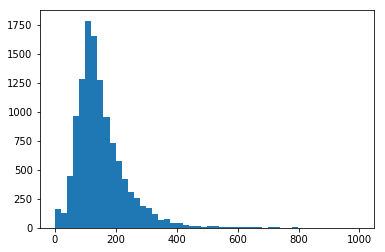

In [14]:
plt.hist(df['BuildingArea'][np.logical_and(df['BuildingArea'].apply(lambda x: not pd.isnull(x)),df['BuildingArea']<1000)],50)

In [15]:
def price_mq(df_col):
    price = df_col[0]
    area = df_col[1]
    if area > 0 and not pd.isnull(area):
        return round(price/area,2)
    else:
        return None

In [16]:
df['Price_EUR'] = df['Price'].apply(lambda x: round(x*0.651199,2))
df['Price_mq'] = df[['Price_EUR','BuildingArea']].apply(price_mq, axis=1)

In [17]:
df[['Price_EUR','Price_mq']].describe()

,Price_EUR,Price_mq
count,2.285000e+04,9.114000e+03
mean,6.880199e+05,7.184242e+03
std,4.210742e+05,3.623536e+04
min,5.535192e+04,1.982000e+01
25%,4.148138e+05,3.532488e+03
50%,5.730551e+05,4.723235e+03
75%,8.465587e+05,6.104990e+03
max,7.293429e+06,2.482371e+06


In [18]:
df[['Price_EUR','Price_mq']].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29217 entries, 0 to 29216
Data columns (total 2 columns):
Price_EUR    22850 non-null float64
Price_mq     9114 non-null float64
dtypes: float64(2)
memory usage: 456.6 KB


In [19]:
import seaborn as sns

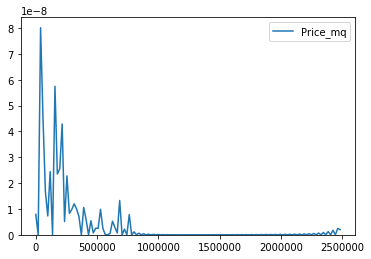

In [20]:
sns.kdeplot(df['Price_mq'][df['Price_mq'].apply(lambda x: not pd.isnull(x))])

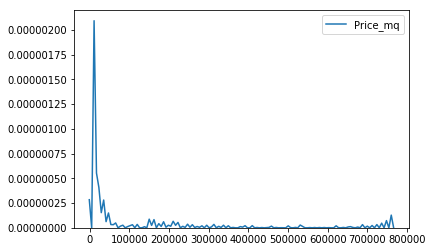

In [21]:
sns.kdeplot(df['Price_mq'][np.logical_and(df['Price_mq'].apply(lambda x: not pd.isnull(x)), df['Price_mq']<1000000)])

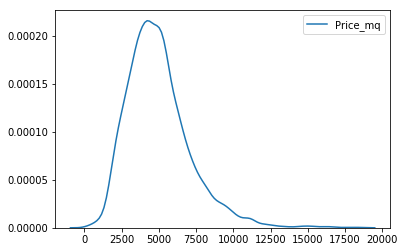

In [22]:
sns.kdeplot(df['Price_mq'][np.logical_and(df['Price_mq'].apply(lambda x: not pd.isnull(x)), df['Price_mq']<20000)])

In [23]:
df['Price_mq'][df['Price_mq']<20000].describe()

count     8990.000000
mean      4982.750877
std       2148.964737
min         19.820000
25%       3522.695000
50%       4692.790000
75%       6035.500000
max      18532.550000
Name: Price_mq, dtype: float64

In [24]:
df[df['Price_mq']>1000000].head(10)

,Suburb,Address,Rooms,Type,Price,Method,SellerG,Date,Distance,Postcode,...,Landsize,BuildingArea,YearBuilt,CouncilArea,Lattitude,Longtitude,Regionname,Propertycount,Price_EUR,Price_mq
19274,Balwyn,27 Burroughs Rd,5,h,3812000.0,S,VICProp,29/07/2017,7.9,3103,...,729.0,1.0,2012.0,Boroondara City Council,-37.806,145.09511,Southern Metropolitan,5682.0,2482370.59,2482370.59


In [25]:
df[df['BuildingArea']<10].count()

Suburb           132
Address          132
Rooms            132
Type             132
Price            111
Method           132
SellerG          132
Date             132
Distance         132
Postcode         132
Bedroom2         132
Bathroom         132
Car              131
Landsize         110
BuildingArea     132
YearBuilt        104
CouncilArea      132
Lattitude        132
Longtitude       132
Regionname       132
Propertycount    132
Price_EUR        111
Price_mq          60
dtype: int64

In [26]:
df['BuildingArea'][df['BuildingArea']<10].describe()

count    132.000000
mean       1.378864
std        1.696501
min        0.000000
25%        0.000000
50%        1.000000
75%        3.000000
max        9.000000
Name: BuildingArea, dtype: float64

In [27]:
df_to_plot = df[['Rooms','Price_EUR','Price_mq','Distance','Bedroom2','Bathroom','Car','YearBuilt']].dropna(how='any')

In [28]:
df_to_plot.describe()

,Rooms,Price_EUR,Price_mq,Distance,Bedroom2,Bathroom,Car,YearBuilt
count,8672.000000,8.672000e+03,8.672000e+03,8672.000000,8672.000000,8672.000000,8672.000000,8672.000000
mean,3.055120,7.037619e+05,6.521266e+03,10.995434,3.033787,1.632034,1.661554,1966.345134
std,0.975046,4.430167e+05,3.377198e+04,6.713171,0.976786,0.719982,0.955452,37.083821
min,1.000000,8.530707e+04,3.091200e+02,0.000000,0.000000,1.000000,0.000000,1196.000000
25%,2.000000,4.109066e+05,3.546778e+03,6.400000,2.000000,1.000000,1.000000,1950.000000
50%,3.000000,5.785903e+05,4.719035e+03,9.900000,3.000000,2.000000,2.000000,1970.000000
75%,4.000000,8.647923e+05,6.069333e+03,13.900000,4.000000,2.000000,2.000000,2000.000000
max,12.000000,5.860791e+06,2.482371e+06,48.100000,12.000000,9.000000,10.000000,2018.000000


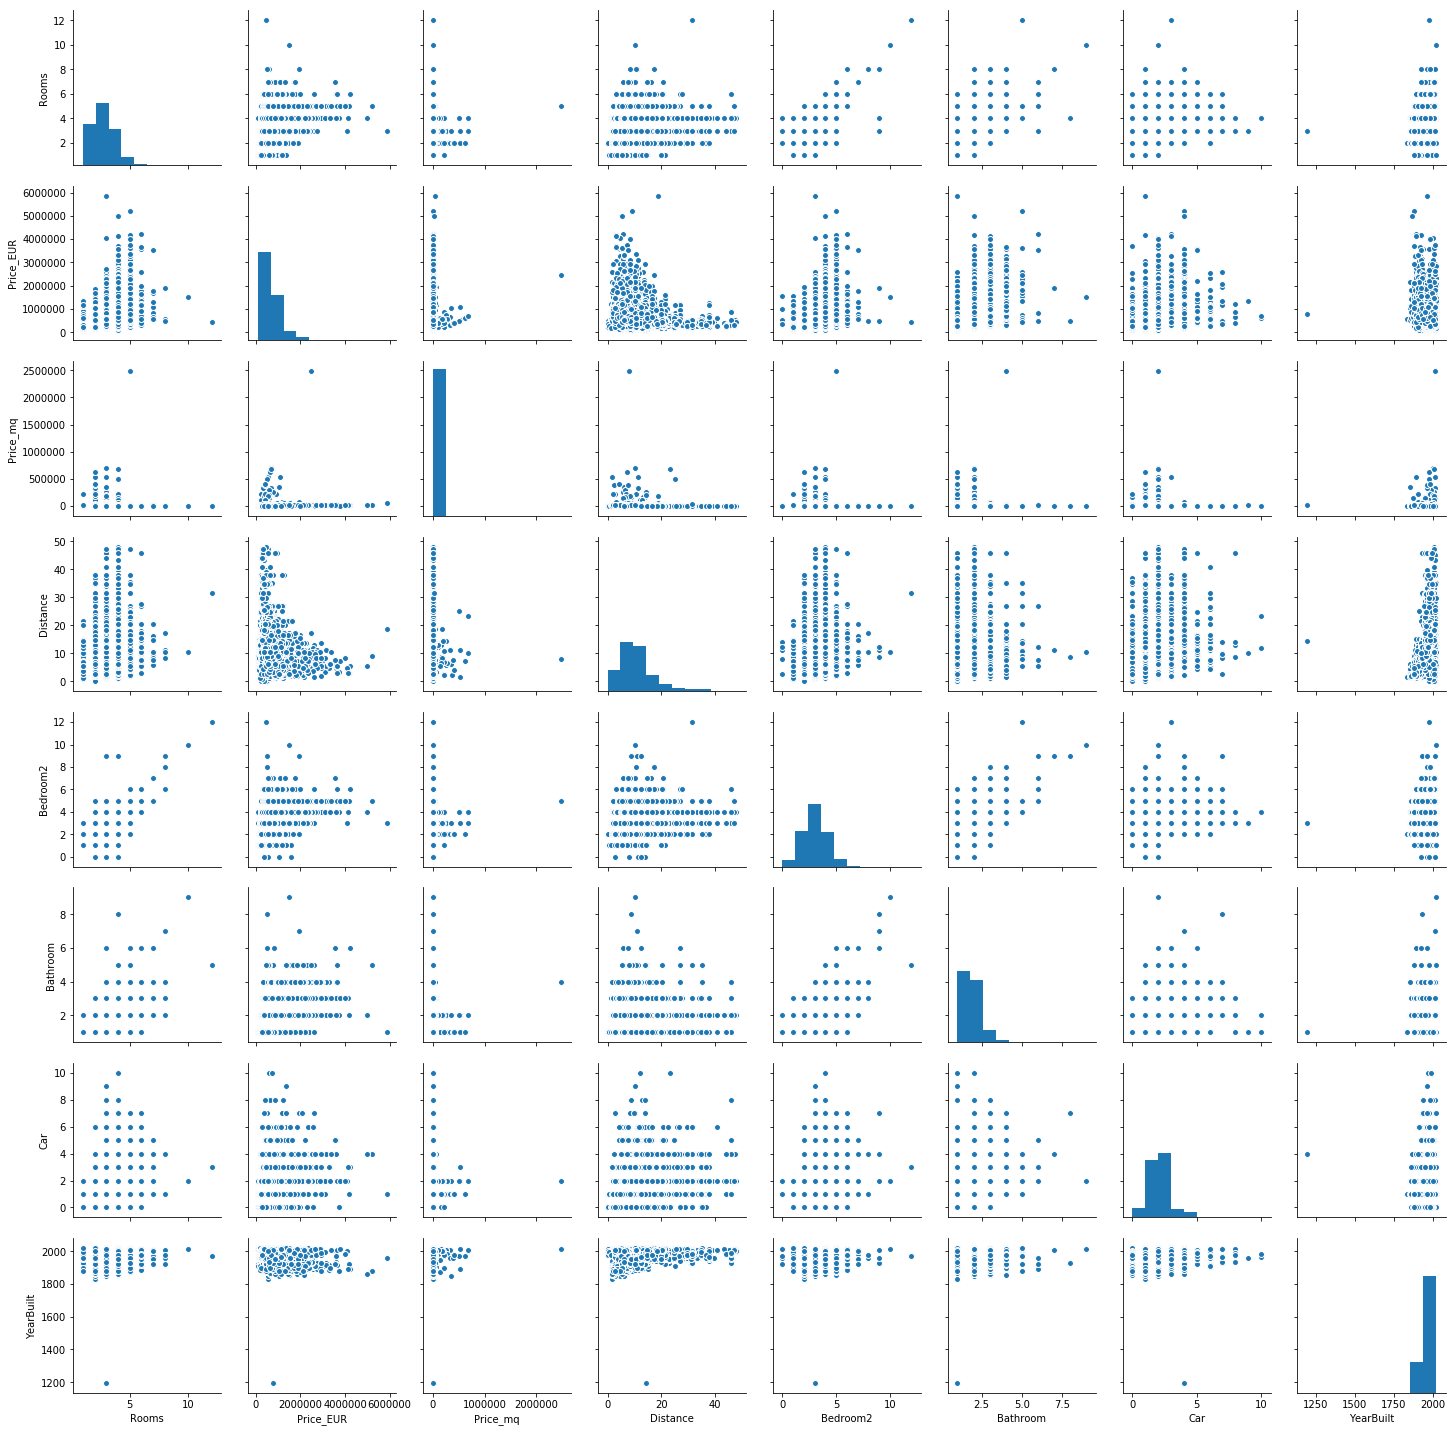

In [29]:
sns.pairplot(df_to_plot)

In [30]:
df[df['Rooms']>11]

,Suburb,Address,Rooms,Type,Price,Method,SellerG,Date,Distance,Postcode,...,Landsize,BuildingArea,YearBuilt,CouncilArea,Lattitude,Longtitude,Regionname,Propertycount,Price_EUR,Price_mq
8309,Preston,12 Lyonsville Av,12,h,NaN,SN,Barry,28/08/2016,8.8,3072,...,NaN,NaN,NaN,Darebin City Council,NaN,NaN,Northern Metropolitan,14577.0,NaN,NaN
12959,Hawthorn,10 Berkeley St,12,h,4700000.0,PI,Property,20/05/2017,4.6,3122,...,NaN,NaN,NaN,Boroondara City Council,-37.83030,145.03670,Southern Metropolitan,11308.0,3060635.30,NaN
26210,Mitcham,20 Harrison St,16,h,5000000.0,S,Buxton,28/10/2017,17.2,3132,...,NaN,NaN,NaN,Whitehorse City Council,-37.81405,145.19891,Eastern Metropolitan,6871.0,3255995.00,NaN
27150,Melton,213 Station Rd,12,h,710000.0,S,PRDNationwide,11/11/2017,31.7,3337,...,960.0,223.0,1970.0,Melton City Council,-37.68830,144.57760,Western Victoria,3600.0,462351.29,2073.32


Before I deal with outliers and Nan I will drop the Landsize, BuildingArea and YearBuilt variables because they have too many missing values. Consequently I have to drop the price_mq variable that I built from the Price and BuildingArea variables.

In [31]:
df.drop(['Landsize','BuildingArea','YearBuilt','Price_mq'], axis=1, inplace=True)
df.dropna(how='any',inplace=True)

In [32]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 17481 entries, 1 to 29216
Data columns (total 19 columns):
Suburb           17481 non-null object
Address          17481 non-null object
Rooms            17481 non-null int64
Type             17481 non-null object
Price            17481 non-null float64
Method           17481 non-null object
SellerG          17481 non-null object
Date             17481 non-null object
Distance         17481 non-null float64
Postcode         17481 non-null int64
Bedroom2         17481 non-null float64
Bathroom         17481 non-null float64
Car              17481 non-null float64
CouncilArea      17481 non-null object
Lattitude        17481 non-null float64
Longtitude       17481 non-null float64
Regionname       17481 non-null object
Propertycount    17481 non-null float64
Price_EUR        17481 non-null float64
dtypes: float64(9), int64(2), object(8)
memory usage: 2.7+ MB


In [33]:
def check_outliers(dfx):
    dfx['_tmp_'] = ''
    for i in df.columns:
        if(i not in ['Lattitude', 'Longtitude', 'Postcode'] and (dfx[i].dtype == np.float64 or dfx[i].dtype == np.int64)):
            x = dfx[i]
            idx = np.abs(x - x.mean()) / x.std() > 4.0
            dfx.loc[idx,'_tmp_'] = i

In [34]:
check_outliers(df)
df[df['_tmp_']!='']

,Suburb,Address,Rooms,Type,Price,Method,SellerG,Date,Distance,Postcode,Bedroom2,Bathroom,Car,CouncilArea,Lattitude,Longtitude,Regionname,Propertycount,Price_EUR,_tmp_
86,Airport West,3 Deidre Ct,3,h,895000.0,PI,Rendina,10/09/2016,13.5,3042,3.0,1.0,6.0,Moonee Valley City Council,-37.7249,144.8728,Western Metropolitan,3464.0,582823.10,Car
178,Albert Park,115 Page St,4,h,4735000.0,S,Marshall,25/02/2017,3.3,3206,4.0,2.0,1.0,Port Phillip City Council,-37.8477,144.9558,Southern Metropolitan,3280.0,3083427.26,Price_EUR
182,Albert Park,22 Greig St,3,h,3755000.0,S,Greg,26/07/2016,3.3,3206,3.0,2.0,2.0,Port Phillip City Council,-37.8413,144.9500,Southern Metropolitan,3280.0,2445252.25,Price_EUR
235,Altona,29 Rose St,4,h,1780000.0,SP,Greg,4/06/2016,13.8,3018,4.0,3.0,6.0,Hobsons Bay City Council,-37.8681,144.8190,Western Metropolitan,5301.0,1159134.22,Car
284,Altona North,45 Hearn St,5,h,1085000.0,S,FN,3/09/2016,11.1,3025,5.0,3.0,6.0,Hobsons Bay City Council,-37.8388,144.8567,Western Metropolitan,5132.0,706550.91,Car
390,Armadale,553 Dandenong Rd,5,h,1525000.0,PI,Jellis,7/05/2016,6.3,3143,8.0,2.0,2.0,Stonnington City Council,-37.8638,145.0229,Southern Metropolitan,4836.0,993078.47,Bedroom2
426,Armadale,367 Dandenong Rd,6,h,5525000.0,S,Marshall,17/09/2016,6.3,3143,5.0,3.0,4.0,Stonnington City Council,-37.8602,145.0130,Southern Metropolitan,4836.0,3597874.47,Price_EUR
466,Armadale,44 Hampden Rd,4,h,4200000.0,VB,Kay,27/11/2016,6.3,3143,4.0,3.0,3.0,Stonnington City Council,-37.8582,145.0138,Southern Metropolitan,4836.0,2735035.80,Price_EUR
616,Ashburton,115 Ashburn Gr,8,h,2950000.0,S,hockingstuart,10/09/2016,11.0,3147,9.0,7.0,4.0,Boroondara City Council,-37.8729,145.0788,Southern Metropolitan,3052.0,1921037.05,Bathroom
642,Ashburton,29A Yuile St,5,h,3510000.0,S,Jellis,18/03/2017,11.0,3147,5.0,5.0,2.0,Boroondara City Council,-37.8598,145.0796,Southern Metropolitan,3052.0,2285708.49,Bathroom


In [35]:
df = df[df['_tmp_']=='']
df.drop(['_tmp_'], axis=1, inplace=True)

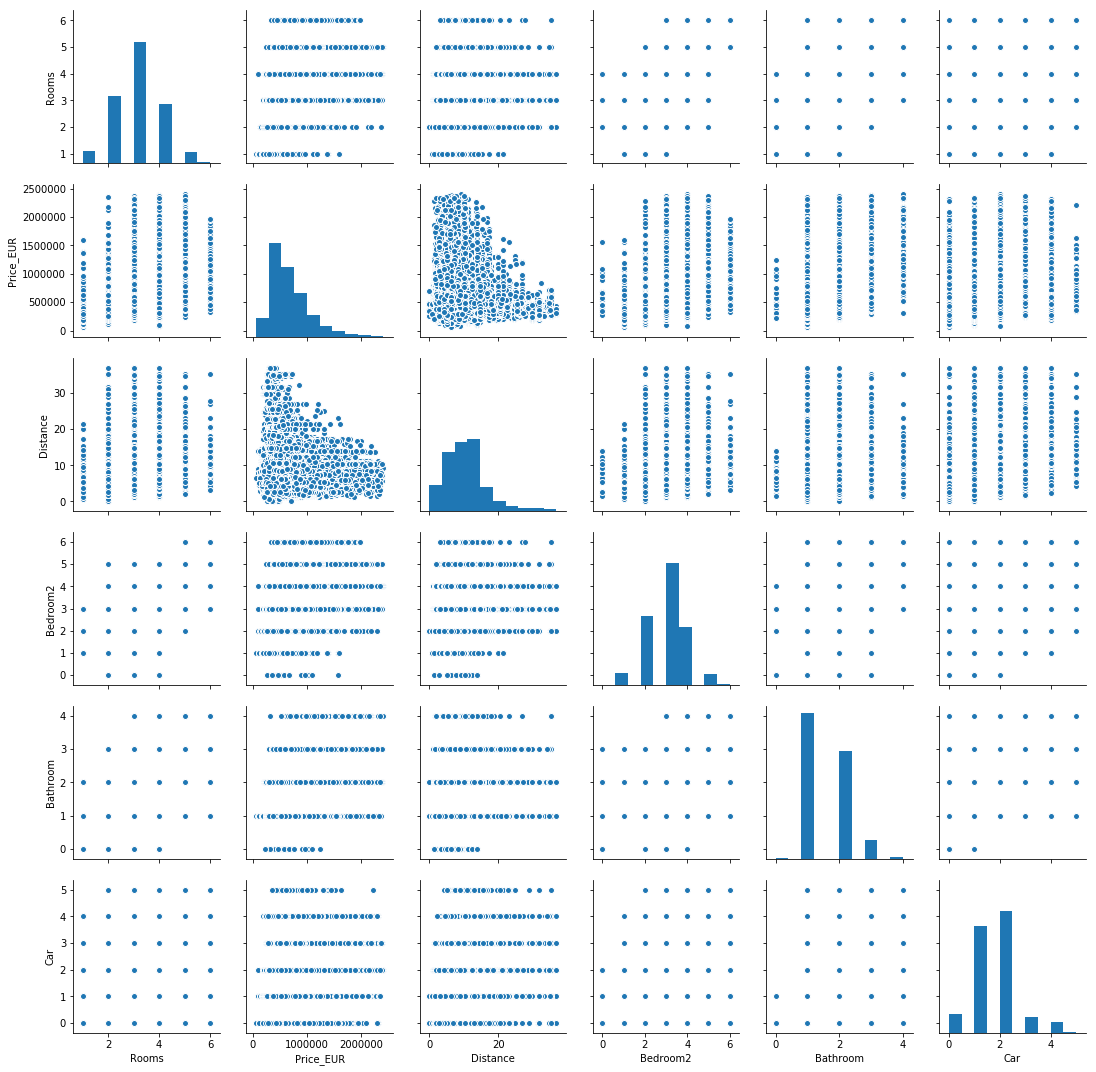

In [36]:
sns.pairplot(df[['Rooms','Price_EUR','Distance','Bedroom2','Bathroom','Car']])

In [44]:
df['last_addr'] = df['Address'].apply(lambda x: x.split()[-1].lower())

In [45]:
df.last_addr.nunique()

66

In [46]:
df.last_addr.value_counts().head(15)

st        9395
rd        3395
ct         909
av         712
dr         681
gr         393
cr         303
pde        259
pl         242
cl         154
wy          99
la          87
bvd         80
tce         57
avenue      44
Name: last_addr, dtype: int64